### Import library

In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns

### Read the CSV file

In [9]:
df = pd.read_csv("df_total.csv")

### Understand the dimensions, features and check for missing values

In [10]:
print(df.isna().sum())
print(df.shape)
print(df.info())
print(list(df.columns))
print(df.describe())

date               0
cases_new          0
cases_recovered    0
cases_active       0
checkin            0
close_contact      0
rtk-ag             0
pcr                0
daily              0
daily_booster      0
cumul_full         0
cumul_booster      0
dtype: int64
(266, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             266 non-null    object
 1   cases_new        266 non-null    int64 
 2   cases_recovered  266 non-null    int64 
 3   cases_active     266 non-null    int64 
 4   checkin          266 non-null    int64 
 5   close_contact    266 non-null    int64 
 6   rtk-ag           266 non-null    int64 
 7   pcr              266 non-null    int64 
 8   daily            266 non-null    int64 
 9   daily_booster    266 non-null    int64 
 10  cumul_full       266 non-null    int64 
 11  cumul_booster    266 non-null 

<AxesSubplot:>

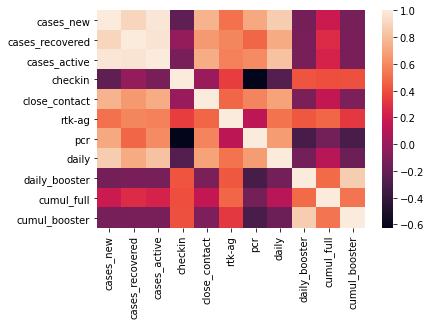

In [11]:
cor_df = df.corr()
round(cor_df,2)
sns.heatmap(cor_df)

### Select independent variables and dependent variables 

In [12]:
X = df.iloc[:, 2:].values
y = df['cases_new'].values
print(X)
print(y)

[[     2486     25456  20953407 ...         0        22         0]
 [     2528     24474  20700283 ...         0        27         0]
 [     2276     23939  21190929 ...         0        33         0]
 ...
 [     5031     68534  31404661 ...     82373 249955762   1416040]
 [     4970     69411  31855483 ...     36979  25001403   1453019]
 [     5525     68729  29963366 ...     30175  25005967   1483194]]
[ 1828  1555  1745  2063  2154  1680  1683  1529  1280  1448  1647  1575
  1470  1354  1208  1063  1219  1213  1576  1671  1327  1116  1384  1268
  1360  1275  1199  1302   941  1133  1482  1178  1294  1638  1349  1070
  1300  1139  1285  1854  1510  1739  1317  1767  1889  2148  2551  2331
  2195  2078  2341  2340  2875  2847  2717  2690  2776  2733  3142  3332
  3788  2881  3418  2500  3120  3744  3551  4498  4519  3733  3807  3973
  4765  4855  4113  4140  3780  4446  4865  6075  6806  6493  6320  6976
  6509  7289  7478  7857  8290  9020  6999  6824  7105  7703  8209  7748
  7452  

### Splitting the dataset into training set and testing set

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[    1509    14197 27301577 ...        0   106205        0]
 [   18613   257778 20099181 ...        0 13654490        0]
 [   18053   222487 25203956 ...        0 17831425        0]
 ...
 [    2848    38322 23265144 ...        0   727511        0]
 [    6831    69706 17026385 ...        0  1475342        0]
 [    7749    78483 16436489 ...        0  1303556        0]]
[[   20845   263372 18305255    43888    54462    54230   327679        0
  14785294        0]
 [    4744    61292 17545075     9730    37719    36384   209849        0
   2140859        0]
 [    5778   122945 17259037    44084    50242    59769   353825        0
   4584856        0]
 [   14454   149874 28330088    32301    70297    27174   215352        5
  20982626       10]
 [    1259    17515 21334315    13750    27499    43027    27104        0
    436334        0]
 [    6026    64114 31349934    28145    89148    32604   116223    74966
  24819615   906161]
 [    9683   158308 16006719    47918    52772    67047   

### Fitting the mutliple linear regression in the training set

In [14]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Predict the test set results

In [15]:
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

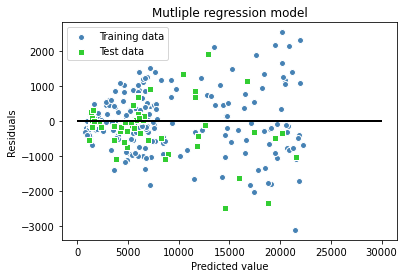

In [16]:
plt.scatter(y_train_pred, y_train_pred - y_train, c='steelblue', marker='o', edgecolor='white', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='limegreen', marker='s', edgecolor='white', label='Test data')
plt.xlabel('Predicted value')
plt.ylabel('Residuals')
plt.title('Mutliple regression model')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=30000, color='black', lw=2)
plt.show()

In [17]:
print('RMSE train: %.3f, test: %.3f' % (np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_test_pred))))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

RMSE train: 850.671, test: 776.996
R^2 train: 0.984, test: 0.981


### Ridge Regresssion

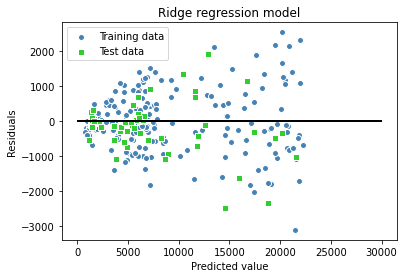

RMSE train: 850.671, test: 776.996
R^2 train: 0.984, test: 0.981


In [18]:
rr = Ridge(alpha=0.1)
rr.fit(X_train, y_train)

y_train_rr = rr.predict(X_train)
y_test_rr = rr.predict(X_test)

plt.scatter(y_train_rr, y_train_rr - y_train, c='steelblue', marker='o', edgecolor='white', label='Training data')
plt.scatter(y_test_rr, y_test_rr - y_test, c='limegreen', marker='s', edgecolor='white', label='Test data')
plt.xlabel('Predicted value')
plt.ylabel('Residuals')
plt.title('Ridge regression model')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=30000, color='black', lw=2)
plt.show()

print('RMSE train: %.3f, test: %.3f' % (np.sqrt(mean_squared_error(y_train, y_train_rr)), np.sqrt(mean_squared_error(y_test, y_test_rr))))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_rr), r2_score(y_test, y_test_rr)))

### Lasso Regression

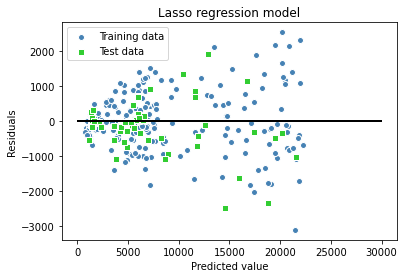

RMSE train: 850.671, test: 776.996
R^2 train: 0.984, test: 0.981


In [19]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_train_lasso = lasso.predict(X_train)
y_test_lasso = lasso.predict(X_test)

plt.scatter(y_train_lasso, y_train_lasso - y_train, c='steelblue', marker='o', edgecolor='white', label='Training data')
plt.scatter(y_test_lasso, y_test_lasso - y_test, c='limegreen', marker='s', edgecolor='white', label='Test data')
plt.xlabel('Predicted value')
plt.ylabel('Residuals')
plt.title('Lasso regression model')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=30000, color='black', lw=2)
plt.show()

print('RMSE train: %.3f, test: %.3f' % (np.sqrt(mean_squared_error(y_train, y_train_lasso)), np.sqrt(mean_squared_error(y_test, y_test_lasso))))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_lasso), r2_score(y_test, y_test_lasso)))

### ElasticNet Regression

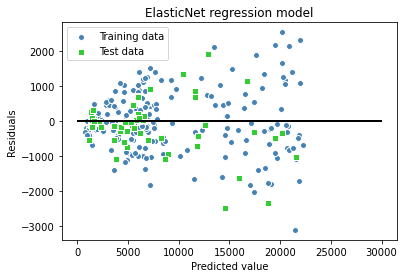

RMSE train: 850.671, test: 776.996
R^2 train: 0.984, test: 0.981


In [20]:
enet = ElasticNet(alpha=0.1)
enet.fit(X_train, y_train)

y_train_enet = enet.predict(X_train)
y_test_enet= enet.predict(X_test)

plt.scatter(y_train_enet, y_train_enet - y_train, c='steelblue', marker='o', edgecolor='white', label='Training data')
plt.scatter(y_test_enet, y_test_enet - y_test, c='limegreen', marker='s', edgecolor='white', label='Test data')
plt.xlabel('Predicted value')
plt.ylabel('Residuals')
plt.title('ElasticNet regression model')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=30000, color='black', lw=2)
plt.show()

print('RMSE train: %.3f, test: %.3f' % (np.sqrt(mean_squared_error(y_train, y_train_enet)), np.sqrt(mean_squared_error(y_test, y_test_enet))))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_enet), r2_score(y_test, y_test_enet)))

### Evaluate the model with the latest data

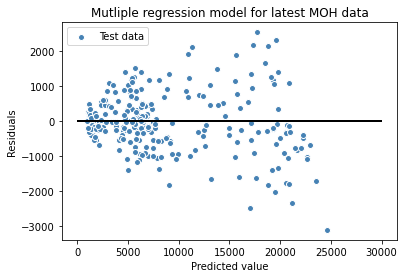

In [25]:
# Since the evaluation results are the same, the testing will be conducted by multiple regression analysis
df_latest = pd.read_csv("df_latest.csv")
X_latest = df.iloc[:, 2:].values
y_latest = df['cases_new'].values

y_test_latest_pred = regressor.predict(X_latest)

plt.scatter(y_latest, y_test_latest_pred - y_latest, c='steelblue', marker='o', edgecolor='white', label='Test data')
plt.xlabel('Predicted value')
plt.ylabel('Residuals')
plt.title('Mutliple regression model for latest MOH data')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=30000, color='black', lw=2)
plt.show()

In [24]:
print('RMSE latest: %.3f' % (np.sqrt(mean_squared_error(y_latest, y_test_latest_pred))))
print('R^2 latest: %.3f' % (r2_score(y_latest, y_test_latest_pred)))

RMSE latest: 836.239
R^2 latest: 0.984
